# 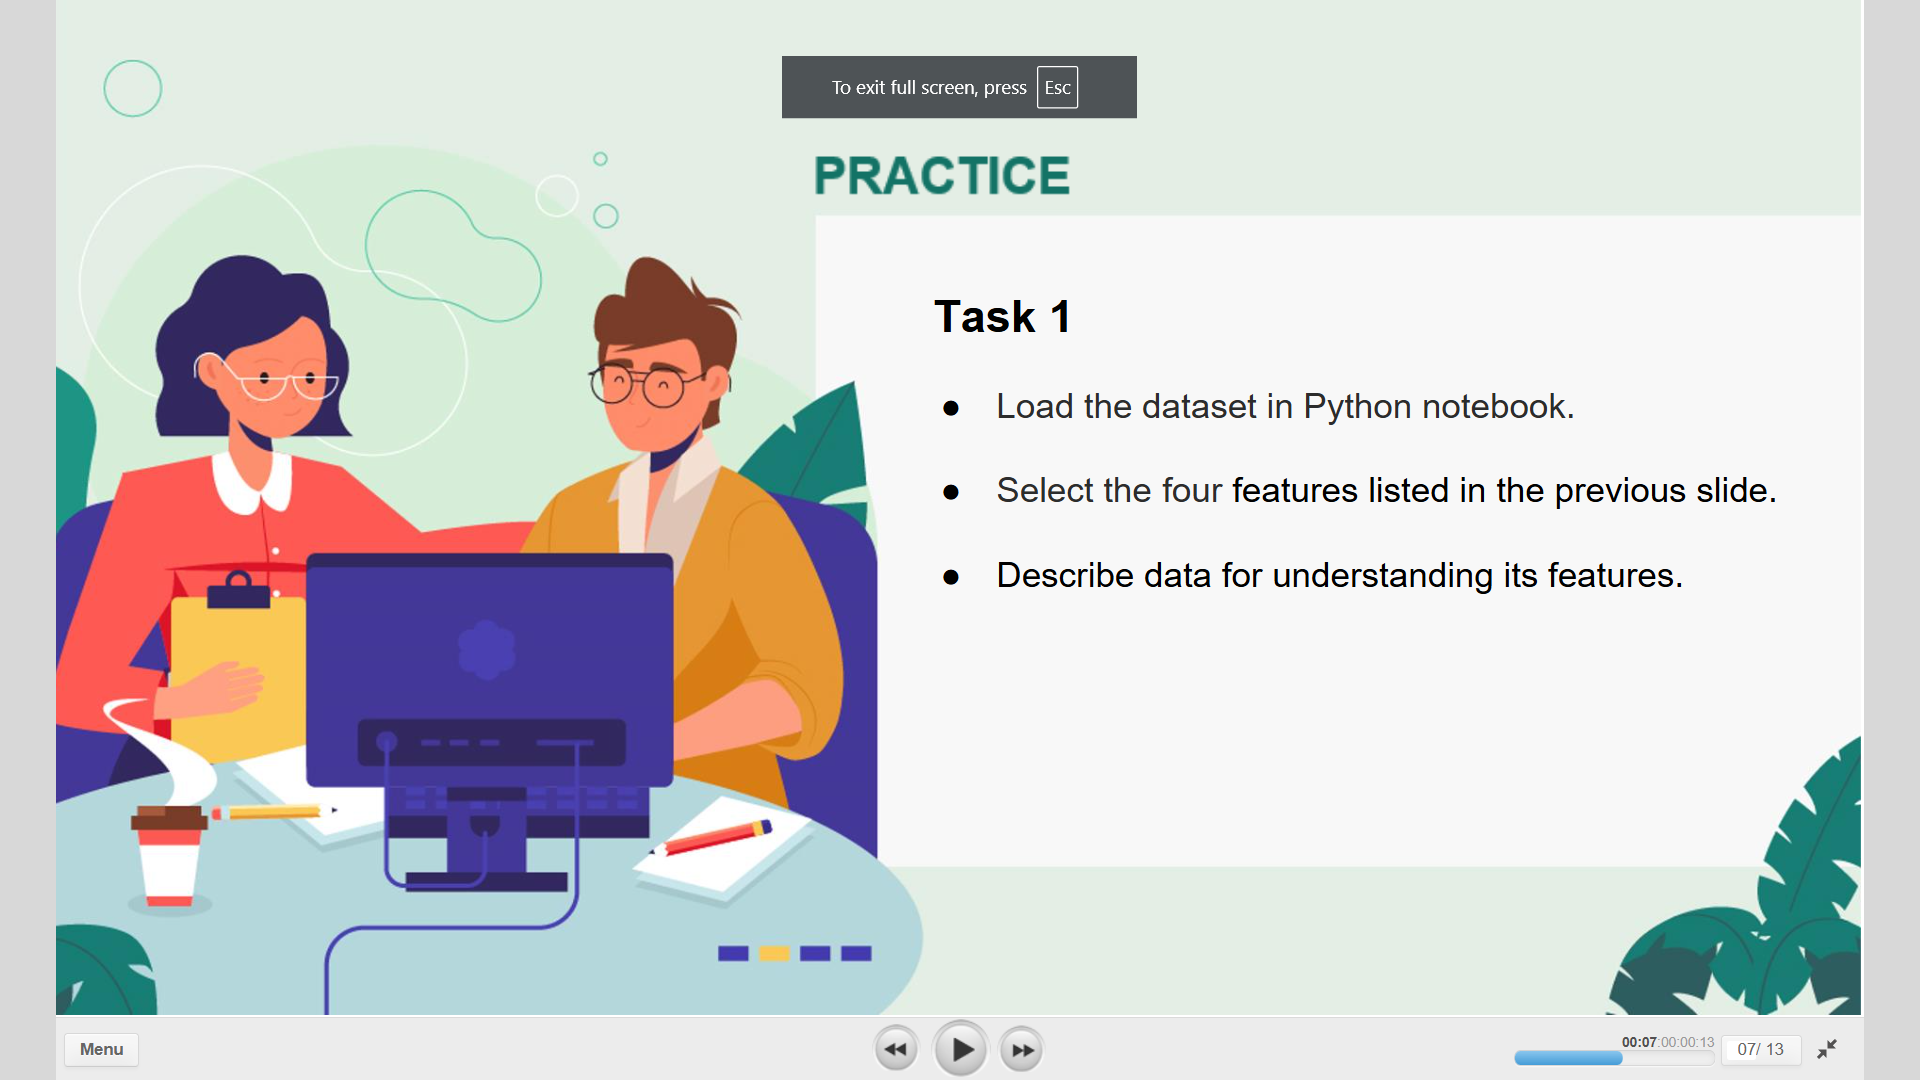

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [4]:
bsdf=pd.read_csv('Downloads/DS1_C9_S2_Practice_BikeSales_Data.csv')
bsdf.head(3)#a)


Date  Day     Month  Year  Customer_Age             Age_Group  \
0  26-11-2013   26  November  2013            19           Youth (<25)   
1  26-11-2015   26  November  2015            19           Youth (<25)   
2  02-08-2013    2    August  2013            29  Young Adults (25-34)   

  Customer_Gender Country             State Product_Category Sub_Category  \
0               M  Canada  British Columbia      Accessories   Bike Racks   
1               M  Canada  British Columbia      Accessories   Bike Racks   
2               M  Canada  British Columbia      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit   Cost  \
0  Hitch Rack - 4-Bike             8.0         45       120.0   590.0  360.0   
1  Hitch Rack - 4-Bike             8.0         45       120.0   590.0  360.0   
2  Hitch Rack - 4-Bike             5.0         45       120.0   369.0  225.0   

   Revenue  
0      950  
1      950  
2      594

In [5]:
# b) 
bs4=bsdf[['Order_Quantity','Unit_Cost','Unit_Price','Customer_Age']]
bs4

Order_Quantity  Unit_Cost  Unit_Price  Customer_Age
0               8.0         45       120.0            19
1               8.0         45       120.0            19
2               5.0         45       120.0            29
3               7.0         45       120.0            29
4               2.0         45       120.0            29
..              ...        ...         ...           ...
495            13.0          2         5.0            37
496            31.0          2         5.0            37
497            11.0          2         5.0            37
498             5.0          2         5.0            37
499             6.0          2         5.0            37

[500 rows x 4 columns]

In [6]:
# c)

bsdf.shape

(500, 18)

In [7]:
bsdf.info()# order quantity and unit price ,Profit,Cost had missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              500 non-null    object 
 1   Day               500 non-null    int64  
 2   Month             500 non-null    object 
 3   Year              500 non-null    int64  
 4   Customer_Age      500 non-null    int64  
 5   Age_Group         500 non-null    object 
 6   Customer_Gender   500 non-null    object 
 7   Country           500 non-null    object 
 8   State             500 non-null    object 
 9   Product_Category  500 non-null    object 
 10  Sub_Category      500 non-null    object 
 11  Product           500 non-null    object 
 12  Order_Quantity    495 non-null    float64
 13  Unit_Cost         500 non-null    int64  
 14  Unit_Price        497 non-null    float64
 15  Profit            498 non-null    float64
 16  Cost              498 non-null    float64
 1

In [8]:
bsdf.describe()

Day         Year  Customer_Age  Order_Quantity   Unit_Cost  \
count  500.000000   500.000000    500.000000      495.000000  500.000000   
mean    15.192000  2014.552000     36.588000       13.375758   16.548000   
std      8.675579     1.116149     11.363649        9.249150   21.759473   
min      1.000000  2013.000000     17.000000        1.000000    2.000000   
25%      9.000000  2014.000000     31.000000        5.000000    2.000000   
50%     16.000000  2014.000000     35.000000       12.000000    3.000000   
75%     22.000000  2016.000000     42.000000       22.000000   45.000000   
max     31.000000  2016.000000     73.000000       32.000000   59.000000   

       Unit_Price       Profit         Cost      Revenue  
count  497.000000   498.000000   498.000000   500.000000  
mean    43.601610   208.435743   130.391566   343.216000  
std     58.344484   340.307443   210.001172   556.346929  
min      5.000000     3.000000     2.000000     5.000000  
25%      5.000000    41.000000    28.000000    69.000000  
50%      9.000000    77.000000    50.000000   129.000000  
75%    120.000000   163.500000   108.000000   272.000000  
max    159.000000  2214.000000  1350.000000  3564.000000

# 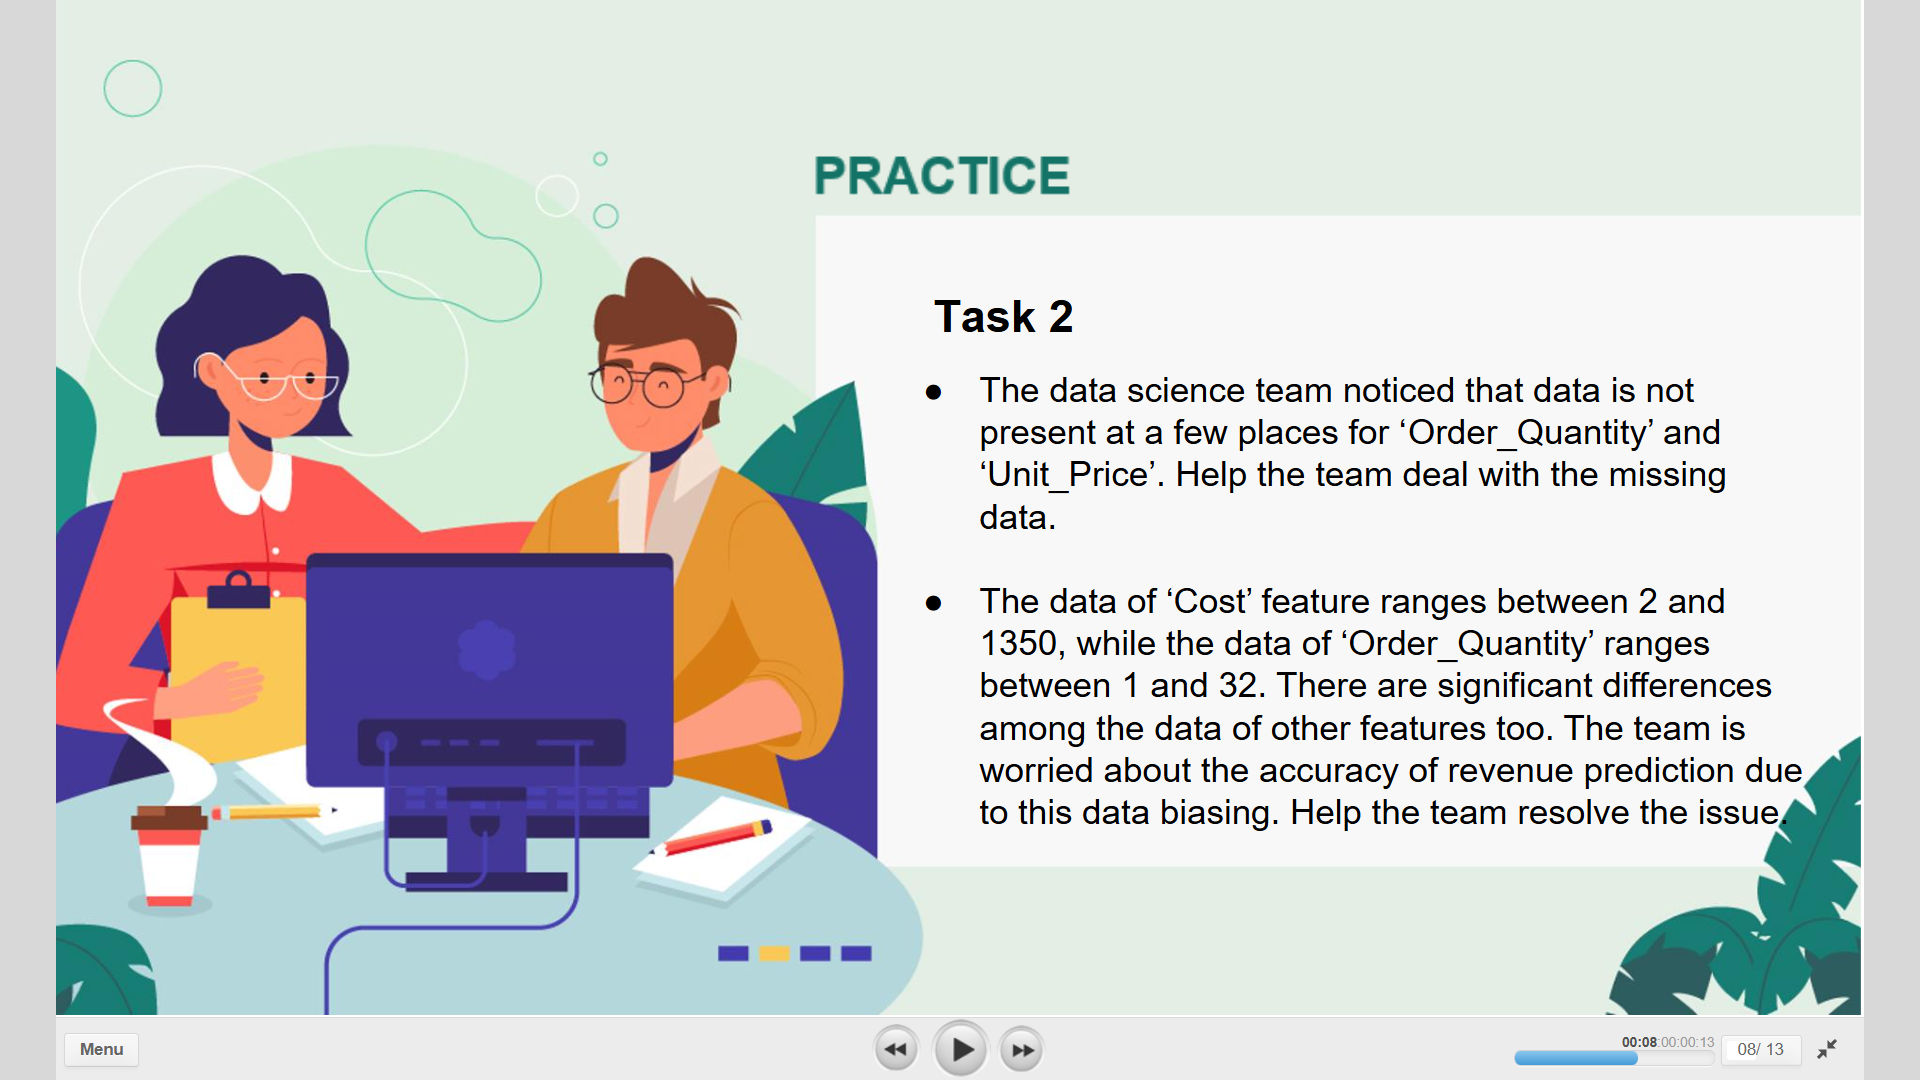

In [10]:
#a)
bsdf# order quantity and unit price ,Profit,Cost
bsdf.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      5
Unit_Cost           0
Unit_Price          3
Profit              2
Cost                2
Revenue             0
dtype: int64

In [11]:
bsdf['Order_Quantity'].fillna(bsdf['Order_Quantity'].mean(),inplace=True)


In [12]:
bsdf['Unit_Price'].fillna(bsdf['Unit_Price'].mean(),inplace=True)

In [13]:
bsdf['Profit'].fillna(bsdf['Profit'].mean(),inplace=True)

In [14]:
bsdf['Cost'].fillna(bsdf['Cost'].mean(),inplace=True)

In [15]:
bsdf.isnull().sum() # replaced missing value with mean of  columns(Order_Quantity,Unit_Price)

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

# b)

In [17]:
bsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              500 non-null    object 
 1   Day               500 non-null    int64  
 2   Month             500 non-null    object 
 3   Year              500 non-null    int64  
 4   Customer_Age      500 non-null    int64  
 5   Age_Group         500 non-null    object 
 6   Customer_Gender   500 non-null    object 
 7   Country           500 non-null    object 
 8   State             500 non-null    object 
 9   Product_Category  500 non-null    object 
 10  Sub_Category      500 non-null    object 
 11  Product           500 non-null    object 
 12  Order_Quantity    500 non-null    float64
 13  Unit_Cost         500 non-null    int64  
 14  Unit_Price        500 non-null    float64
 15  Profit            500 non-null    float64
 16  Cost              500 non-null    float64
 1

# first we need to convert to converto object to int.

In [19]:
cat=bsdf.select_dtypes(include='object')
cat.head(2)

Date     Month    Age_Group Customer_Gender Country  \
0  26-11-2013  November  Youth (<25)               M  Canada   
1  26-11-2015  November  Youth (<25)               M  Canada   

              State Product_Category Sub_Category              Product  
0  British Columbia      Accessories   Bike Racks  Hitch Rack - 4-Bike  
1  British Columbia      Accessories   Bike Racks  Hitch Rack - 4-Bike

In [20]:
for x in bsdf.columns:
    print(bsdf[x].unique())

['26-11-2013' '26-11-2015' '02-08-2013' '02-08-2015' '02-09-2013'
 '02-09-2015' '22-01-2014' '22-01-2016' '17-05-2014' '17-05-2016'
 '25-08-2013' '25-08-2015' '26-12-2013' '26-12-2015' '02-01-2014'
 '02-01-2016' '13-03-2014' '13-03-2016' '23-05-2014' '23-05-2016'
 '11-11-2013' '11-11-2015' '27-08-2013' '27-08-2015' '17-11-2013'
 '17-11-2015' '03-08-2013' '03-08-2015' '19-06-2014' '19-06-2016'
 '29-09-2013' '29-09-2015' '16-05-2014' '16-05-2016' '18-08-2013'
 '18-08-2015' '07-09-2013' '07-09-2015' '11-06-2014' '11-06-2016'
 '07-01-2014' '07-01-2016' '16-01-2014' '16-01-2016' '18-02-2014'
 '18-02-2016' '17-12-2013' '17-12-2015' '26-08-2013' '26-08-2015'
 '20-01-2014' '20-01-2016' '09-09-2013' '09-09-2015' '28-09-2013'
 '28-09-2015' '21-09-2013' '21-09-2015' '14-05-2014' '14-05-2016'
 '06-09-2013' '06-09-2015' '24-11-2013' '24-11-2015' '14-02-2014'
 '14-02-2016' '01-02-2014' '01-02-2016' '18-07-2014' '18-07-2016'
 '27-04-2014' '27-04-2016' '20-04-2014' '20-04-2016' '10-03-2014'
 '10-03-20

In [21]:
for x in cat.columns:
    bsdf[x]=bsdf[x].astype('category')

In [22]:
bsdf.info()# converted object to category data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Date              500 non-null    category
 1   Day               500 non-null    int64   
 2   Month             500 non-null    category
 3   Year              500 non-null    int64   
 4   Customer_Age      500 non-null    int64   
 5   Age_Group         500 non-null    category
 6   Customer_Gender   500 non-null    category
 7   Country           500 non-null    category
 8   State             500 non-null    category
 9   Product_Category  500 non-null    category
 10  Sub_Category      500 non-null    category
 11  Product           500 non-null    category
 12  Order_Quantity    500 non-null    float64 
 13  Unit_Cost         500 non-null    int64   
 14  Unit_Price        500 non-null    float64 
 15  Profit            500 non-null    float64 
 16  Cost              500 non-

In [23]:
#bsdf
label_encoder=preprocessing.LabelEncoder()
for x in cat.columns:
    bsdf[f'{x}_encode']=label_encoder.fit_transform(bsdf[x])

In [24]:
bsdf

Date  Day      Month  Year  Customer_Age             Age_Group  \
0    26-11-2013   26   November  2013            19           Youth (<25)   
1    26-11-2015   26   November  2015            19           Youth (<25)   
2    02-08-2013    2     August  2013            29  Young Adults (25-34)   
3    02-08-2015    2     August  2015            29  Young Adults (25-34)   
4    02-09-2013    2  September  2013            29  Young Adults (25-34)   
..          ...  ...        ...   ...           ...                   ...   
495  18-02-2014   18   February  2014            37        Adults (35-64)   
496  18-02-2016   18   February  2016            37        Adults (35-64)   
497  18-02-2016   18   February  2016            37        Adults (35-64)   
498  04-03-2014    4      March  2014            37        Adults (35-64)   
499  04-03-2014    4      March  2014            37        Adults (35-64)   

    Customer_Gender Country             State Product_Category  ... Revenue  \
0                 M  Canada  British Columbia      Accessories  ...     950   
1                 M  Canada  British Columbia      Accessories  ...     950   
2                 M  Canada  British Columbia      Accessories  ...     594   
3                 M  Canada  British Columbia      Accessories  ...     832   
4                 M  Canada  British Columbia      Accessories  ...     238   
..              ...     ...               ...              ...  ...     ...   
495               M  Canada  British Columbia      Accessories  ...      64   
496               M  Canada  British Columbia      Accessories  ...     153   
497               M  Canada  British Columbia      Accessories  ...      54   
498               M  Canada  British Columbia      Accessories  ...      25   
499               M  Canada  British Columbia      Accessories  ...      30   

    Date_encode  Month_encode  Age_Group_encode  Customer_Gender_encode  \
0           234             9                 3                       1   
1           235             9                 3                       1   
2            16             1                 2                       1   
3            17             1                 2                       1   
4            18            11                 2                       1   
..          ...           ...               ...                     ...   
495         158             3                 0                       1   
496         159             3                 0                       1   
497         159             3                 0                       1   
498          38             7                 0                       1   
499          38             7                 0                       1   

     Country_encode  State_encode  Product_Category_encode  \
0                 0             1                        0   
1                 0             1                        0   
2                 0             1                        0   
3                 0             1                        0   
4                 0             1                        0   
..              ...           ...                      ...   
495               0             1                        0   
496               0             1                        0   
497               0             1                        0   
498               0             1                        0   
499               0             1                        0   

     Sub_Category_encode  Product_encode  
0                      0               1  
1                      0               1  
2                      0               1  
3                      0               1  
4                      0               1  
..                   ...             ...  
495                    2               4  
496                    2               4  
497                    2               4  
498                    2               4  
499               

In [25]:
bsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Date                     500 non-null    category
 1   Day                      500 non-null    int64   
 2   Month                    500 non-null    category
 3   Year                     500 non-null    int64   
 4   Customer_Age             500 non-null    int64   
 5   Age_Group                500 non-null    category
 6   Customer_Gender          500 non-null    category
 7   Country                  500 non-null    category
 8   State                    500 non-null    category
 9   Product_Category         500 non-null    category
 10  Sub_Category             500 non-null    category
 11  Product                  500 non-null    category
 12  Order_Quantity           500 non-null    float64 
 13  Unit_Cost                500 non-null    int64   
 14  Unit_Price

In [26]:
def feature_scale(sclae):
    numerics=['int32','int64','float64','float32']
    new_bike_df=bsdf.select_dtypes(include=numerics)
    if scale=="minmax":
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    df_scaled=pd.DataFrame(scaler.fit_transform(new_bike_df.to_numpy()),columns=new_bike_df.columns)
    return df_scaled

In [27]:
scale='minmax'
bike_df_scaled=feature_scale(scale)
bike_df_scaled.head(2)

Day      Year  Customer_Age  Order_Quantity  Unit_Cost  Unit_Price  \
0  0.833333  0.000000      0.035714        0.225806   0.754386    0.746753   
1  0.833333  0.666667      0.035714        0.225806   0.754386    0.746753   

     Profit      Cost   Revenue  Date_encode  Month_encode  Age_Group_encode  \
0  0.265491  0.265579  0.265524     0.832740      0.818182               1.0   
1  0.265491  0.265579  0.265524     0.836299      0.818182               1.0   

   Customer_Gender_encode  Country_encode  State_encode  \
0                     1.0             0.0           1.0   
1                     1.0             0.0           1.0   

   Product_Category_encode  Sub_Category_encode  Product_encode  
0                      0.0                  0.0            0.25  
1                      0.0                  0.0            0.25

# 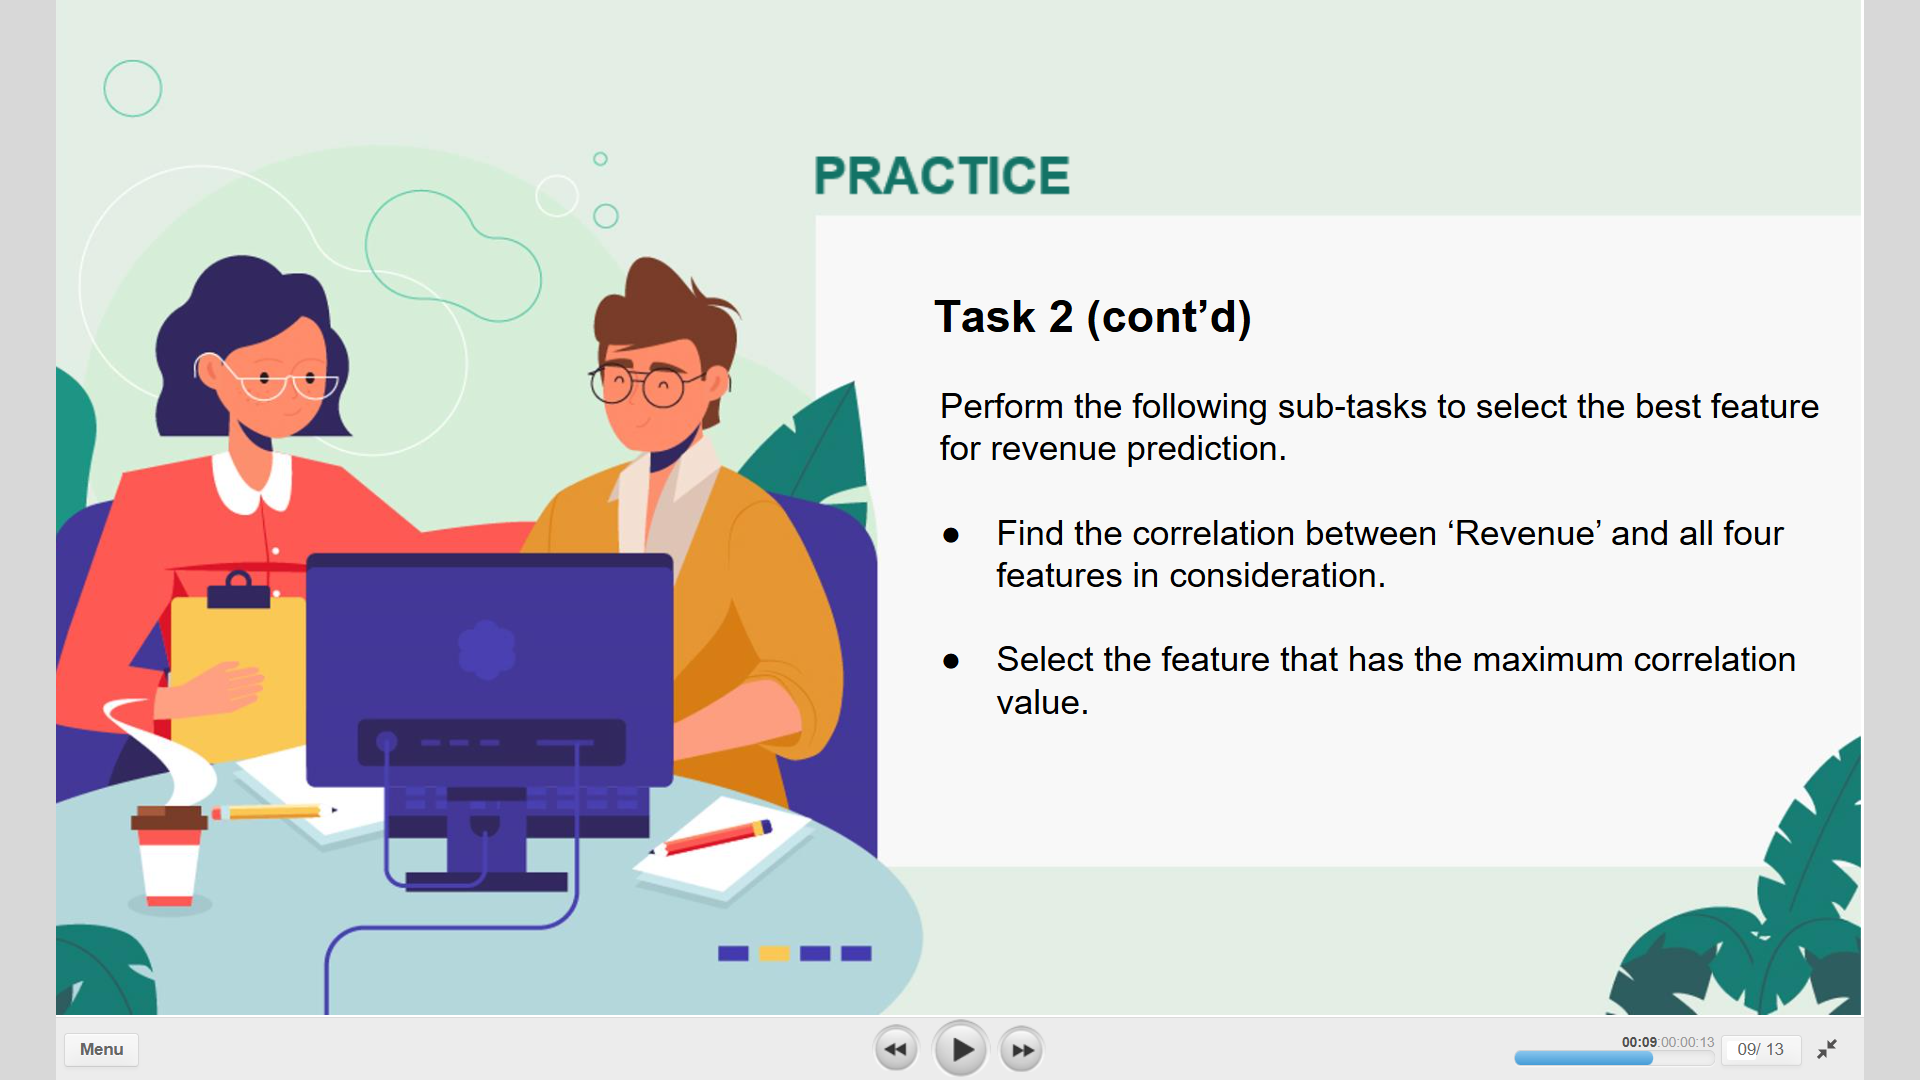

In [29]:
bs4.columns

Index(['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Customer_Age'], dtype='object')

In [30]:
corr=bike_df_scaled[['Revenue','Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Customer_Age']].corr()
corr.style.background_gradient(cmap='coolwarm')

In [31]:
#Unit_Cost has max correlation(0.64)

# 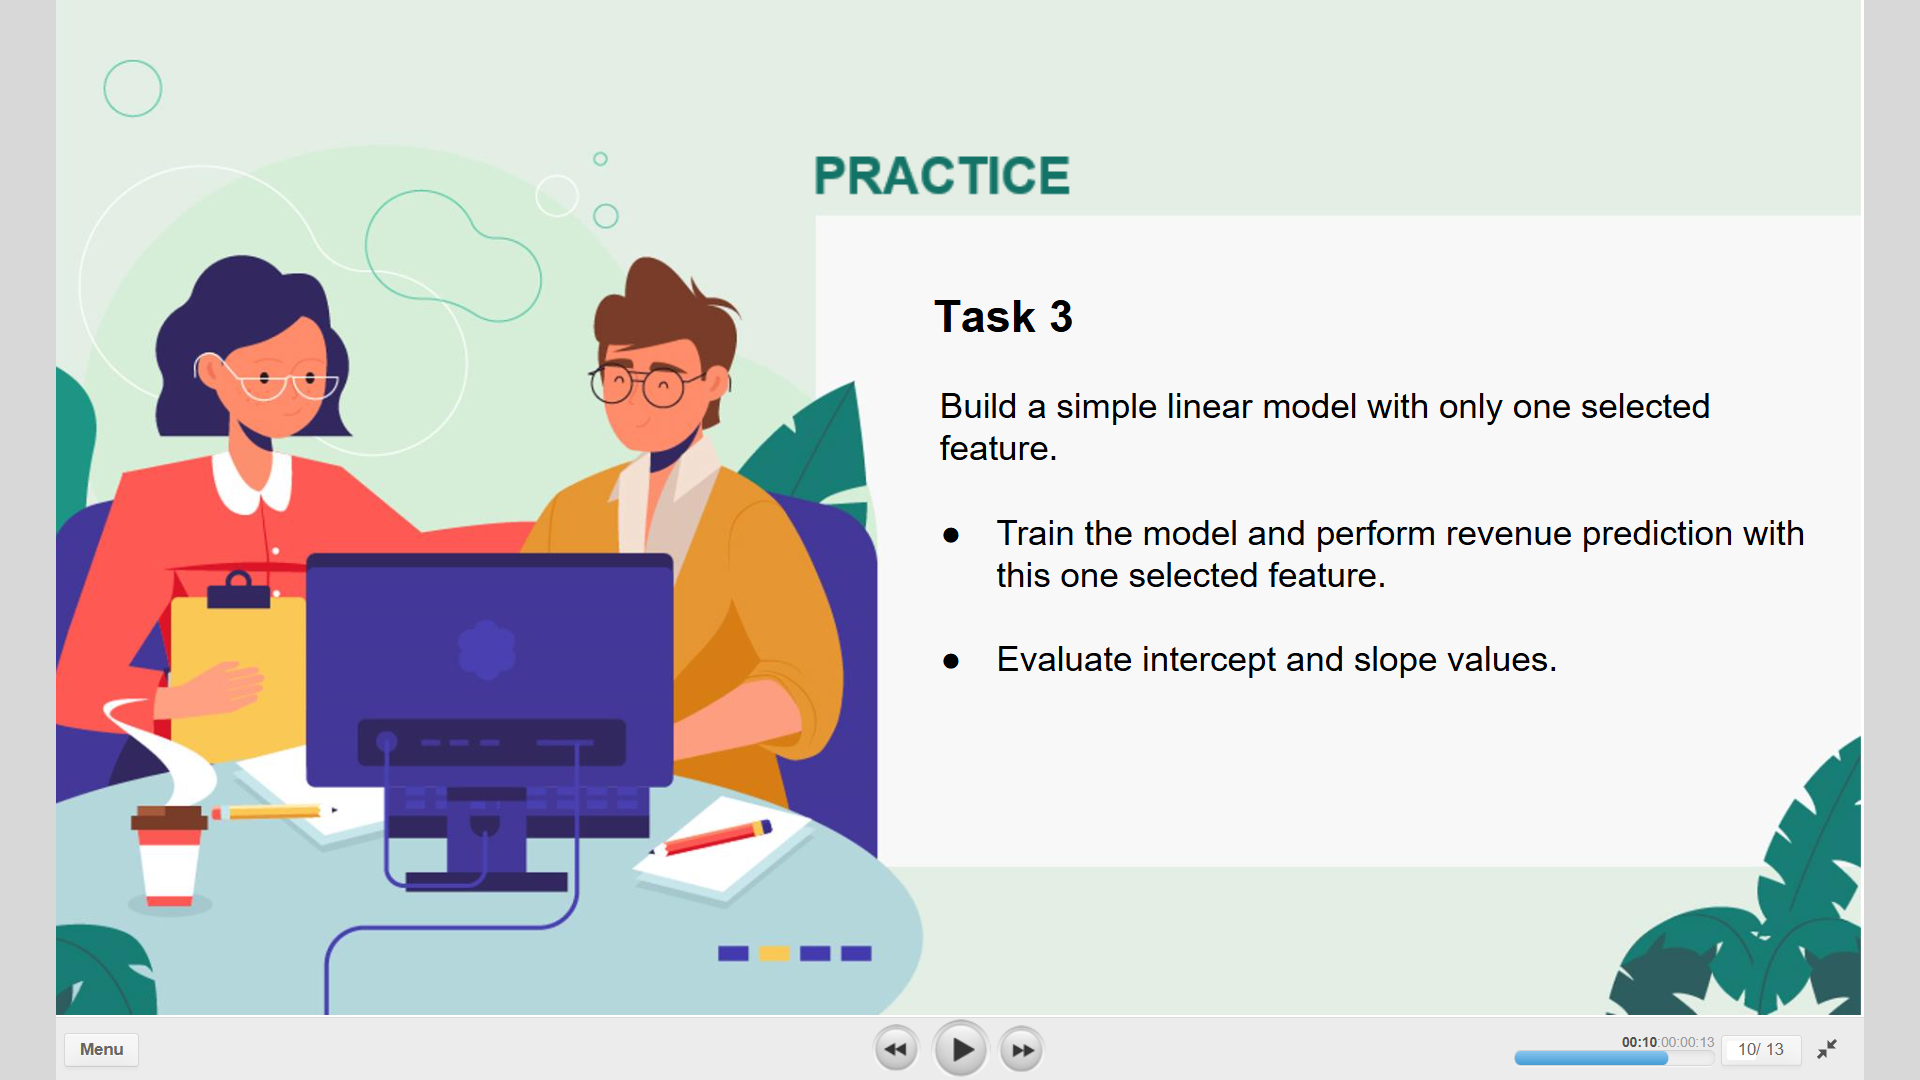

In [33]:
x_dr=np.array(bsdf['Revenue']).reshape((-1,1))

In [68]:
y=np.array(bsdf['Unit_Cost'])


In [72]:
X_train_gr,X_test_gr,y_train,y_test=train_test_split(x_dr,y,test_size=0.3,random_state=100)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [82]:
s_model=LinearRegression().fit(X_train_gr,y_train)
s_r_sq=s_model.score(X_train_gr,y_train)#r square value
s_r_sq

0.47583179910590345

# it tell approx 47.58% in the y_train can be explained by the linear relationship x_train_gr.this is mediacorately food fit,but it suggests there might be other factors influencing y_train that are not capture by the linear model. 

In [87]:
print('intercept:',s_model.intercept_)
print('slope:',s_model.coef_)

intercept: 6.710204073320304
slope: [0.02925148]


# intercept(6.7):this shows the intercept of the linear regression model .the intercept is the value of y when x is 0.
# slope:(0.02):the slope represents the change in y in every one unit cchange in x.

# 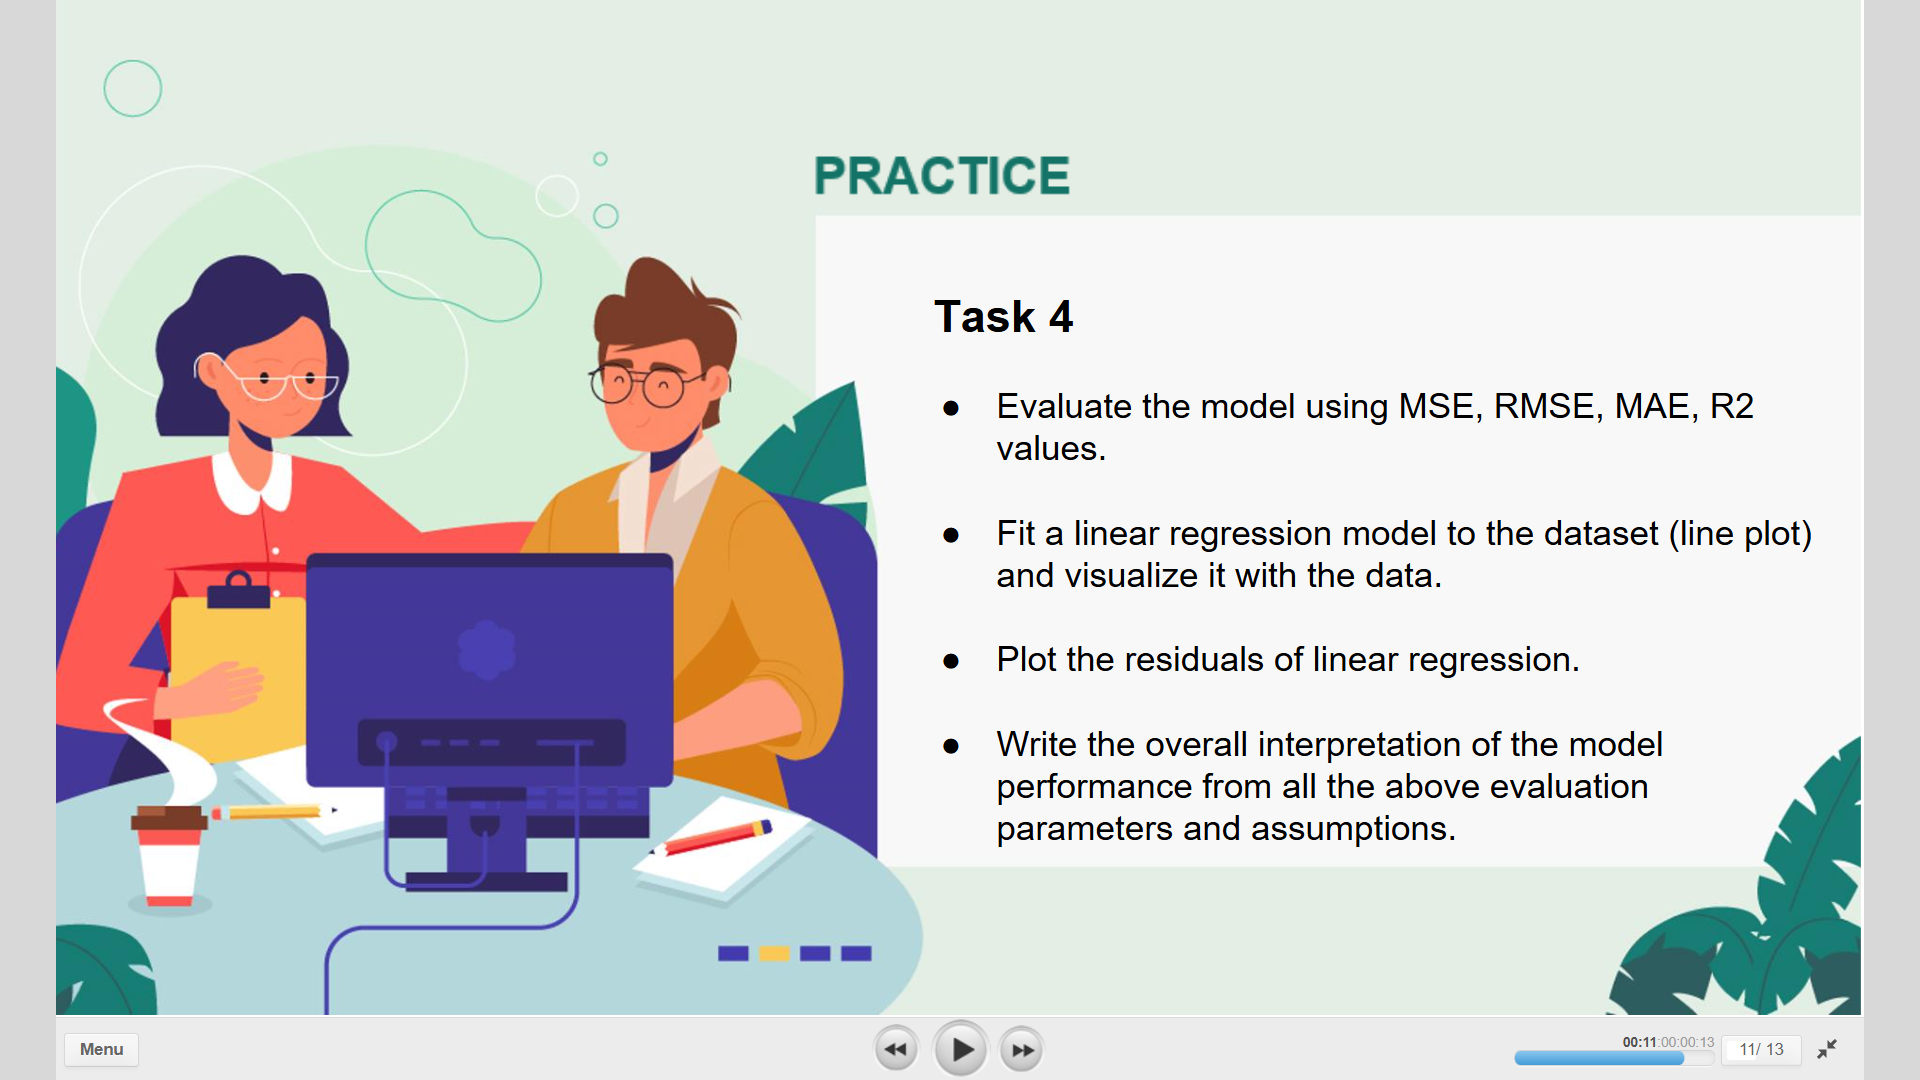

In [96]:
y_predict_gr=s_model.predict(X_test_gr)

In [98]:
# evaluate MSE,RMSE,MAE
mse=mean_squared_error(y_test,y_predict_gr)
print('mean squared error',mse)
mae=mean_absolute_error(y_test,y_predict_gr)
print('mean absolute error',mae)
rmse=mean_squared_error(y_test,y_predict_gr,squared=False)
print('root mean squared error',rmse)

mean squared error 358.9245167630646
mean absolute error 13.834521762308013
root mean squared error 18.945303290342558


In [100]:
# evaluate r2 square
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_predict_gr)
R2

0.21952789679646278

# intepretation:the r2 value is lower only 0.21 so this does not represents better fit.
# mse mae and rmse are  higher so it is not good for this model.


In [124]:
def calculate_residuals(model,features,label):
    #Creates predictions on the features with the model and calculates residuals
    predictions=model.predict (features)
    df_results=pd.DataFrame({'Actual':label,'Predicted':predictions})
    df_results['Residuals']=abs(df_results['Actual'])-abs(df_results['Predicted'])
    return df_results
def linear_assumption(model,features,label):
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    ## Calculating residuals for the plot
    
    df_results=calculate_residuals(model,features,label)
     # Plotting the actual vs predicted values
    sns.lmplot(x='Actual',y='Predicted',data=df_results,fit_reg=False)
    # Plotting the diagonal line
    line_cords=np.arange(df_results.min().min(),df_results.max().max())
    plt.plot(line_cords,line_cords,color='darkorange',linestyle='--')
    plt.title('Actual vs Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


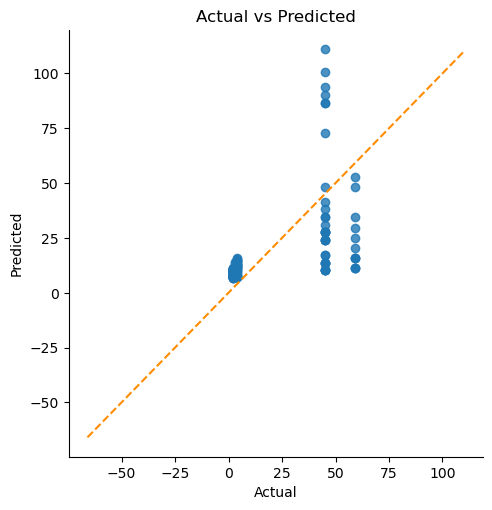

In [126]:
linear_assumption(s_model,X_test_gr,y_test)

#  the plot helps us to see if there is a linear relationship between a feature and target.if the plot roughly follow a digaonal line

In [146]:
def homoscedasticity_assumption(model,feature,label):
    print('Assumptiion:Homoscedasticity of the erroe terms','\n')
    print('Residuals should have relativve constant variance')

# calculate residuals fo the plot
    df_results=calculate_residuals(model,feature,label)

# plotting the residuals
    plt.subplots(figsize=(12,6))
    ax=plt.subplot(111)
    plt.scatter(x=df_results.index,y=df_results.Residuals)
    plt.plot(np.repeat(0,df_results.index.max()),color='darkorange',linestyle='--')
    plt.title('Residual Plot')
    plt.xlabel('index')
    plt.ylabel('Residuals')
    plt.show()

Assumptiion:Homoscedasticity of the erroe terms 

Residuals should have relativve constant variance


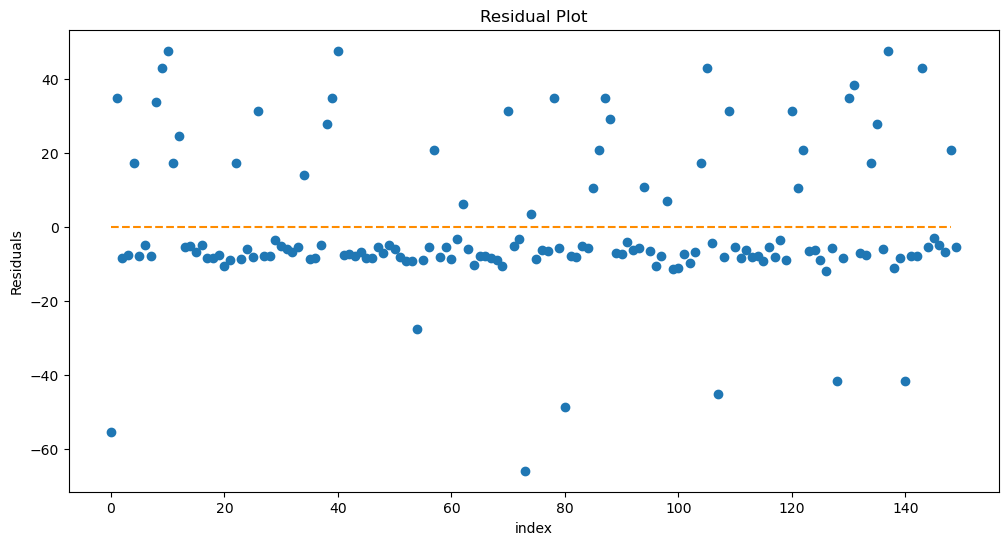

In [148]:
homoscedasticity_assumption(s_model,X_test_gr,y_test)

# the residuals are scattered randomly around the horizontal line.

# intepretation:the r2 value is lower only 0.21 so this does not represents better fit.
# mse mae and rmse are higher so it is not good for this model.
# ¶There is a linear relationship between a feature and target.if the plot roughly follow a digaonal line.
# the residuals are scattered randomly around the horizontal line.
